<h1>DEEP-EMOTIVE</h1>
<h2>Trabalho de conclusão de curso - Ciência da Computação  - FURB - 2017</h2>
<h3>Autor: Diogenes Ademir Domingos<br>
 Modulo de transferência de aprendizado<br>
 Base de dados JAFFE - detecção da face</h3>

Deep-Emotive é um protótipo para reconhecer e classificar as expressões faciais das emoções, alegria, desgosto, medo, raiva, surpresa, tristeza, consideradas por Ekman et al. (1987), como básicas e universais, utilizando técnicas já consolidadas das áreas de Processamento Digital de Imagem e Visão Computacional. Estas técnicas são combinadas com uma nova abordagem, considerada a mais avançada no reconhecimento visual de objetos através do aprendizado de máquina, o Aprendizado Profundo ou Deep Learning. 


In [1]:
# Bibliotecas necessárias para execução do módulo de detecção da face
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import os
import numpy as np

%matplotlib inline

In [2]:
# Criar instancia do classificar
def _criar_classificador_face(opencv):
    """ Esta função é responsável por criar uma instancia do
        classificador Viola-Jones, implementado pela
        biblioteca opencv. Recebe como entrada uma objeto opencv
        e retorna o classificador
        localizada

        Args:
            opencv (obj): objeto da biblioteca opencv.

        Returns:
            obj: classificador Viola-Jones.
    """ 
    # caminho absoluto do classificador em cascata da biblioteca OpenCV
    cascade_file_src = "./opencv/sources/data/haarcascades/haarcascade_frontalface_default.xml"
    # cria a instancia do objeto classificador
    faceCascade = opencv.CascadeClassifier(cascade_file_src)
    return faceCascade

In [3]:
# detectando faces na imagem
def _identificar_face(imagem, classificador, dimensao=1.2, vizinhos=5):
    """ Esta função é responsável por reconhecer uma face na imagem.
        Recebe como entrada uma objeto de imagem python e retorna tupla
        contendo a localização espacial (x1,y1,x2,y2), onde a face está
        localizada

        Args:
            imagem (PIL): objeto de imagem python.

        Returns:
            tuple: tupla contendo a localização espacial (x1,y1,x2,y2).
    """    
    # Aplica a técnica de Viola-Jones para identificação das
    # regiões de interesse (detectMultiScale).
    # As regiões de interresse passadas por um classificar em cascata (faceCascade)
    face = classificador.detectMultiScale(imagem , dimensao, vizinhos)
    return face

In [4]:
# Segmentação da região de interesse.
def segmentar_uma_face(imagem, box, opencv):
    """ Esta função é responsável por desenhar a bounding box
        da face na imagem. Recebe como entrada uma imagem
        e uma tupla contendo a localização espacial (x1,y1,x2,y2), 
        onde a face está localizada.

        Args:
            imagem (PIL): objeto de imagem python.
            box (tuple): tupla contendo a localização 
            espacial (x1,y1,x2,y2).
        
        Returns:
            imagem: imagem com o desenho da bounding box
    """ 
    crop = []
    for (x, y, w, h) in box:
        opencv.rectangle(imagem,
                      (x, y),      # limites espaciais
                      (x+w, y+h),  # largura e altura
                      (0, 255, 0), # cor da caixa
                      2)           # tipo da linha desenhada
        #recorte = imagem[y+2: (y+h)-2, x+2: (x+w)-2] # recorte
        recorte = imagem[y: (y+h), x: (x+w)] # recorte
        crop.append(recorte)
    return crop

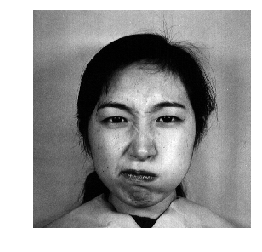

In [5]:
# Importar uma imagem para teste do classificador
imagePath = './transfer learning/jaffeimages/original/KA.AN1.39.tiff'
imagem = cv2.imread(imagePath)
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.axis('off')
plt.imshow(imagem_cinza, cmap='gray')
plt.show()

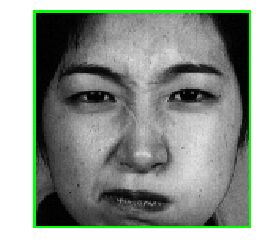

In [6]:
face_cascade = _criar_classificador_face(cv2)
box = _identificar_face(imagem, face_cascade)
imagem_segmentada = segmentar_uma_face(imagem, box, cv2)
imgg = Image.fromarray(imagem_segmentada[0])


plt.axis('off')
plt.imshow(imgg)
plt.show()

In [7]:
# diretorio database imagens
path1 = './transfer learning/jaffeimages/original'    #path of folder of images    
path2 = './transfer learning/jaffeimages/faces-jaffe'  #path of folder to save images

In [8]:
# listando a quantidade de pastas no diretório imagens
imagens_originais = os.listdir(path1)
num_imagens = len(imagens_originais)
print("Quantidade de imagens: ",num_imagens)


Quantidade de imagens:  213


In [9]:
def carregar_imagens(path):
    """ Esta função é responsável por importar as imagens para 
        o protótipo. Recebe como entrada o caminho do diretório
        onde as imagens estão localizadas. Retorna uma lista 
        de tuplas de duas posições. A primeira posição é o
        objeto de imagem e a segunda é a emoção da imagem.

        Args:
            path (string): caminho do diretório onde as imagens 
            estão localizadas.

        Returns:
            tuple (len=2): tupla contendo objeto imagem e emoção.
    """  
    imagens = [] # lista para guardar as faces segmentadas
    # pega todos os arquivos da emocao
    files = [f for f in os.listdir(path)]

    print('Carregando imagens...')
    for file in files:  # para cada imagem

        path = path1 + '\\' + file #caminho absoluto
        im = Image.open(path) # obj PIL
        imagens.append((im, file)) # insere face an lista

    print('Imagens carregadas com sucesso!')
    print('Quantidade de imagens: ',len(imagens))
    return imagens

In [10]:
imagens = carregar_imagens(path1)

Carregando imagens...
Imagens carregadas com sucesso!
Quantidade de imagens:  213


In [11]:
def segmentar_faces(imagens, formato='.png'):
    """ Esta função é responsável por segmentar
        a face na imagem. Recebe como entrada uma 
        lista de tuplas (imagens,emocao). Retornar a 
        uma lista de tuplas (faces,emocao) extraídas de cada imagem.

        Args:
            imagens (list): lista de tuplas (imagens,filename) 

        Returns:
            list: uma lista de tuplas (faces,emocao).
    """
    faces = [] # lista para guardar as faces segmentadas
    face_cascade = _criar_classificador_face(cv2)  # classificador
    print('Segmentando faces, por favor aguarde...')
    for i, (imagem, filename) in enumerate(imagens):

        box = _identificar_face(np.asarray(imagem), 
                            face_cascade) # encontra face       
        for (x, y, w, h) in box: # bounding box
            # recorta a região de interesse
            crop_im = imagem.crop((x, y, x+w, y+h)).resize((224,224))
            faces.append((crop_im, filename)) # insere face an lista

    print('Segmentação de faces concluida com sucesso!')
    print('Quantidade de faces segmentadas: ',len(faces))
    return faces

In [12]:
faces = segmentar_faces(imagens)

Segmentando faces, por favor aguarde...
Segmentação de faces concluida com sucesso!
Quantidade de faces segmentadas:  213


In [13]:
def salvar_faces(path, faces, formato='.png'):
    """ Esta função é responsável por salvar 
        as faces segmentadas na nova base de dados.
        Recebe como parâmentro o caminho da base de dados.
        A lista contendo as faces segmentadas.
        O formato que deseja salvar as imagens

        Args:
            path (string): caminho absolutor para nova base
            face (list): lista com as faces segmentadas
            formato (string): extensão da imagem
    """
    
    print('Salvando faces, por favor aguarde...')
    #_criar_diretorio_faces(path,classes_emocoes)
    
    for i, (face, filename) in enumerate(faces):
        file = path + '\\' + filename
        if not os.path.exists(file):
            face.save(file)
            
    print('Faces salvas com sucesso!')

In [14]:
salvar_faces(path2, faces)

Salvando faces, por favor aguarde...
Faces salvas com sucesso!
